In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
# pd.read_sql('SELECT date FROM measurement ORDER BY date DESC LIMIT 1',engine)
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23')

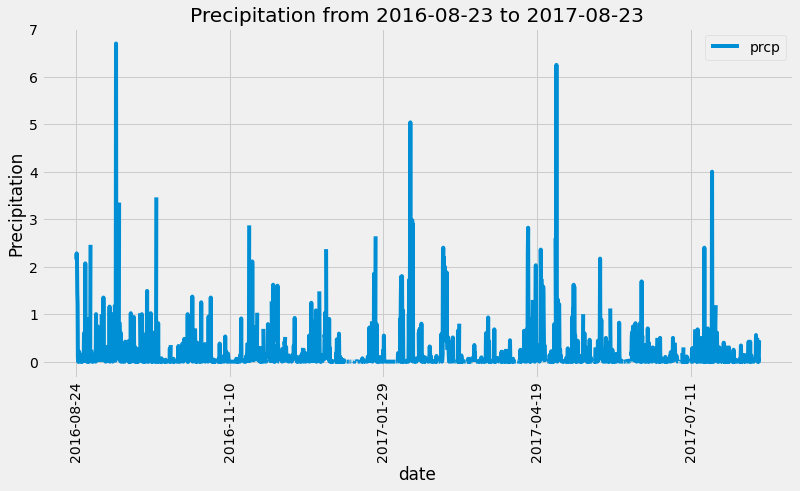

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_before_last = dt.datetime.strptime(last_date[0], "%Y-%m-%d") - dt.timedelta(days=365)
#year_before_last

# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_before_last).all()
#query

# Save the query results as a Pandas DataFrame and set the index to the date column
measurements_df = pd.DataFrame(query)
#measurements_df

# Sort the dataframe by date
measurements_df = measurements_df.set_index('date')
measurements_df = measurements_df.sort_values(by = 'date')

# Use Pandas Plotting with Matplotlib to plot the data
measurements_df.plot(rot=90,figsize=(12,6))
plt.ylabel('Precipitation')
plt.title(f"Precipitation from {year_before_last.date()} to {last_date[0]}")
plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurements_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(measurement).group_by(measurement.station).count()

9

In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(measurement.station,                                 
                                func.count(measurement.station))\
                                .group_by(measurement.station)\
                                .order_by(func.count(measurement.station)\
                              .desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temperatures = session.query(func.min(measurement.tobs), func.max(measurement.tobs),
                      func.avg(measurement.tobs))\
                        .filter(measurement.station == active_stations[0][0]).all()
temperatures

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

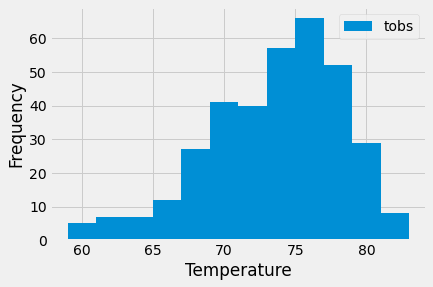

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures_most_active = session.query(station.name, measurement.date, measurement.tobs
    ).filter(measurement.date >= year_before_last
    ).filter(measurement.station == station.station
    ).filter(measurement.station == active_stations[0][0]
    ).all()
temperatures_df = pd.DataFrame(temp_obs)
temperatures_df.plot(kind="hist",bins=12)
plt.xlabel("Temperature")

# Close session

In [35]:
# Close Session
session.close()

In [13]:
start = '2017-01-01'
start_date = start.split("-")
start_date = dt.date(int(start_date[0]), int(start_date[1]), int(start_date[2]))   

session = Session(engine)

results = session.query(measurement.date,\
                        func.min(measurement.tobs),\
                        func.avg(measurement.tobs),\
                        func.max(measurement.tobs)).\
            filter(measurement.date >= start_date).\
            all()
results
    

[('2017-05-23', 58.0, 74.14387974230493, 87.0)]

In [ ]:
# Close Session
session.close()